In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import cv2  

In [2]:
def selection(img):
    index = np.unravel_index(np.argmax(img), img.shape, order='F')    
    return index    

In [3]:
def mask_it(img, cx, cy, r, color=0, thickness=-1):
    roi = np.zeros(img.shape, np.uint8)
    roi = cv2.circle(roi, (cx,cy), r, color=1, thickness=thickness)
    masked_data = cv2.bitwise_and(img, img, mask=roi)
    return masked_data

In [4]:
def monte_carlo_sampling(mask_img):
    samples = list(np.argwhere(mask_img>0))
    random.shuffle(samples)
    return samples

In [5]:
def select_start(img):
    for i in range(img.shape[0]):
        if img[i,1]>0: 
            return (i,1)

In [6]:
def is_los(img, start, end):
    roi = np.zeros(img.shape, np.uint8)
    roi = cv2.line(roi, start, end, 1, thickness=1)    
    line = cv2.bitwise_and(img, img, mask=roi)     
    return len(list(np.argwhere(roi>0))) == len(list(np.argwhere(line>0))), line 

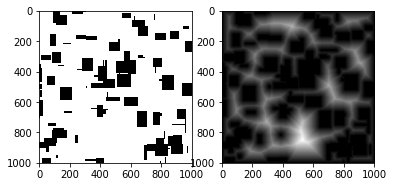

In [7]:
max_size = 1000
image = np.ones((max_size,max_size),np.uint8)

borda = 1
image[0:borda] = 0 # top
image[:,0:borda] = 0 # left
image[:,max_size-borda:max_size] = 0 # right
image[max_size-borda:max_size,:] = 0 # bottom


# DRAW RECTANGLES
for i in range(100):    
    # represents the top left corner of rectangle 
    start_point = (random.randint(0,max_size), random.randint(0,max_size)) 
    # represents the bottom right corner of rectangle 
    end_point = (random.randint(-100,100)+start_point[0], random.randint(-100,100)+start_point[1])             
    # Using cv2.rectangle() method 
    # Draw a rectangle of black color of thickness -1 px 
    image = cv2.rectangle(image, start_point, end_point, color=0, thickness=-1) 
    
# Perform the distance transform algorithm
dist = cv2.distanceTransform(image, cv2.DIST_L2, 3)  
norm_image = dist/(np.max(dist)-np.min(dist))
index = np.unravel_index(np.argmax(norm_image), norm_image.shape, order='F')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, 'gray', interpolation='none')
plt.subplot(1,2,2)
plt.imshow(norm_image, 'gray', interpolation='none')
plt.show()
# print(norm_image[1,1],image[1,1])

In [8]:
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(output, 'gray', interpolation='none')
# plt.subplot(1,2,2)
# plt.imshow(masked_data, 'gray', interpolation='none')

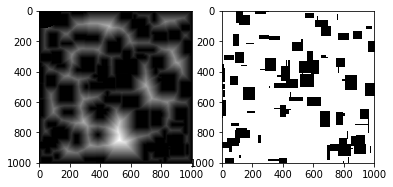

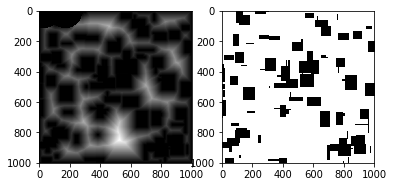

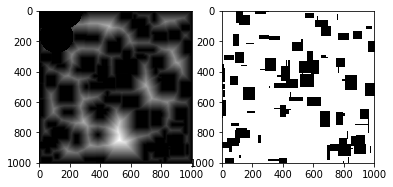

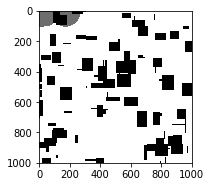

In [10]:
output = norm_image.copy()
r = 200
to_print = np.ones((max_size,max_size),np.uint8)*255
index = select_start(image)
masked_data = mask_it(output,*index,r,thickness=-1)

cv2.circle(output, (index[1], index[0]),110, color=0, thickness=-1)
cv2.circle(to_print, (index[1], index[0]),110, color=100, thickness=-1)

for j in range(3):

    samples = monte_carlo_sampling(masked_data) # Sampling    

    for i in range(len(samples)):
        new_index = tuple(samples[i])
        flag, line = is_los(norm_image, index, new_index)
        
        if flag:
#             print(flag)
            
            cv2.circle(output, (new_index[1],new_index[0]), 110, color=0, thickness=-1)
            cv2.circle(to_print, (index[1], index[0]),100, color=110, thickness=-1)
            
            masked_data = mask_it(output,*new_index,r,thickness=-1)
            index = new_index      
            
            plt.figure()
            plt.subplot(1,2,1)
            plt.imshow(output, 'gray', interpolation='none')
            plt.subplot(1,2,2)
            plt.imshow(image, 'gray', interpolation='none')
            break
            
final = cv2.bitwise_and(image*255, to_print)  
plt.figure()
plt.subplot(1,2,1)
plt.imshow(final, 'gray', interpolation='none')

# print(index,new_index)
# print(samples[0])

# while not flag:
# #     new_index = monte_carlo_sampling(output) # Sampling           
#     flag, line = is_los(output, index, new_index)
#     print(new_index, flag)


# # print(index, new_index)

In [ ]:
# output = norm_image.copy()
# r = 250
# index = select_start(norm_image)
# print(index)
# for i in range(10):
    
#     output = mask_it(output,*index,r,thickness=-1) # Sensing range 
#     new_index = monte_carlo_sampling(output) # Sampling    
#     # masked_data = mask_it(output,*new_index,r,thickness=-1)
    
# #     while not is_los(output, index, new_index):
# #     new_index = monte_carlo_sampling(output)
# #     masked_data = mask_it(output,*new_index,r,thickness=-1)
#     flag, line = is_los(output, index, new_index)
#     while not flag:
#         break
# #     print(is_los(output, index, new_index))
# #     print(index, new_index, flag)
    
# #     for j in range(100):
# #         new_index = monte_carlo_sampling(output) # Sampling    
# #         print(is_los(output, index, new_index))
# #         print(index, new_index)    



In [ ]:
# output = norm_image.copy()
# for i in range(100):
#     index = np.unravel_index(np.argmax(output), (1000,1000), order='F')
#     r = 10
#     output = cv2.circle(output,index,r,1,thickness=-1)

In [ ]:
# roi = np.zeros((1000,1000),np.uint8)
# cx = 5
# cy = 5
# r = 250
# roi= cv2.circle(roi,(cx,cy),r,1,thickness=-1)
# masked_data = cv2.bitwise_and(dist, dist, mask=roi)

In [ ]:
# - sensing model (obstacles and other objects (for the semantic ))
# - semantic search
# Will we have an IRM?


In [ ]:
#     roi = np.zeros(output.shape, np.uint8)
#     roi = cv2.line(roi, (cx,cy), r, color=1, thickness=thickness)
#     roi = cv2.line(roi, index, new_index, 1, thickness=5)     
#     line = cv2.bitwise_and(output, output, mask=roi)